# **FINANCE 781**

**Lecture 6**

## **Neural Networks (Part I: The Basics)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import plot_model

np.random.seed(0)

2024-09-20 14:25:33.646387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Step 1: Preparation**


In [14]:
# Define the parameters

In_Sample = 2520        # Approximate number of trading days in 10 years

Out_of_Sample = 126     # Approximate number of trading days in six months

In [15]:
def actual_vs_predicted_plot(actual, predicted, in_sample):
    """
    The actual_vs_predicted_plot function visualizes a comparison between actual values and predicted values.
    The plot considers both in-sample and out-of-sample observations
    """
    
    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 7))
    plt.title('Actual vs Predicted Values')
    plt.xlabel('')
    plt.ylabel('')
    
    
    # Historical prices
    ax.plot(actual, color='black', label='Actual')
    ax.plot(predicted[:in_sample],
              color='Blue',
              label='Predicted (in-sample)')
    ax.plot(predicted[in_sample:],
              color='Red',
              label='Predicted (out-of-sample)')
    
    # plt.legend()
    plt.tight_layout()
    plt

In [16]:
def r_squared_score(actual, predicted):
    
    """
    Calculate and print the R2 score between actual and predicted values.
    """

    r_squared = r2_score(actual, predicted)

    print(f"R-squared value: {r_squared}")

### **Step 2: Generate the data**

The data set (initially) represents a simple linear relationship (e.g., y = 2x + 1), which is split into training and test sets.

In [61]:
# Sample Data: 
# Start with a simple linear relationship (y = 2x + 1)
# Then consider a non-linear relationship (y = 2x**2 + 1)

X = np.random.rand(In_Sample+Out_of_Sample, 1)  # 100 samples, 1 feature
y = 2 * X + 1

# Create a DataFrame
df = pd.DataFrame({
    'X': X.flatten(),
    'y': y.flatten()
})

df_train = df[:In_Sample]
df_test = df[In_Sample:]

df

,X,y
0,0.349666,1.699331
1,0.180530,1.361060
2,0.074733,1.149466
3,0.025845,1.051691
4,0.412538,1.825076
...,...,...
2641,0.091663,1.183327
2642,0.169913,1.339826
2643,0.308490,1.616980
2644,0.278069,1.556138


### **Step 3: The Regression Model**

Our benchmark model is the lineear regression model estimated with OLS.

The model is available from the statsmodels package.
This can also be done in sklearn following the textbook.

In [41]:
indep_var = ['X']

# Assuming df_train['y'] is your dependent variable and df_train['x'] your independent variable
y = df_train['y']

# Add a constant to the model (for the intercept)
X = sm.add_constant(df_train[indep_var])

# Fit the model
# Make sure the dependent variable (y) is the first argument
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 3.788e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:10:26   Log-Likelihood:                 1232.9
No. Observations:                2520   AIC:                            -2462.
Df Residuals:                    2518   BIC:                            -2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6717      0.006    114.706      0.0

**Assessing the accuracy of the model**

In [62]:
y_pred = model.predict(sm.add_constant(df[indep_var]))

df_reg = pd.DataFrame({
    'obs': df['y'],
    'pred': y_pred
})
# df_reg = df_reg.sort_values(by=['obs']).reset_index()

actual_vs_predicted_plot(df_reg['obs'], df_reg['pred'], In_Sample)

y_pred_oos = model.predict(sm.add_constant(df_test[indep_var]))
r_squared_score(df_test[['y']], y_pred_oos)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_6/dense_12/Relu' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/f5/qbf1k8rs1fb1mnv0b9p9x_480000gn/T/ipykernel_4341/1981862930.py", line 1, in <module>
      y_pred = model.predict(sm.add_constant(df[indep_var]))
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_6/dense_12/Relu'
Matrix size-incompatible: In[0]: [32,2], In[1]: [1,16]
	 [[{{node sequential_6/dense_12/Relu}}]] [Op:__inference_predict_function_45984]

### **Step 4: The Neural Network Model**

We'll begin by defining a simple neural network with one unit and a linear activation function, using the Tensorflow Keras package.

In [55]:
def neural_netork(input_dim):
  model = Sequential()
  
  model.add(Dense(16, input_shape=(input_dim,), activation='relu'))
  model.add(Dense(8, activation='relu'))


  # A single Dense layer (perceptron) with 1 unit and a linear activation function
  model.add(Dense(1, activation='linear'))

  # Compile the model
  # The optimizer is set to 'adam', and the loss function to 'mean_squared_error'
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='mean_squared_error'
                )

  # Summary of the model to see its structure
  print(model.summary())

  return model

In [63]:
# Train the model
# Using df_train['x'] as input and df_train['y'] as the target

indep_var = ['X']

model = neural_netork(len(indep_var))
history = model.fit(df_train[indep_var].values, df_train['y'].values,
                    epochs=10,
                    batch_size=16,
                    validation_split=0,
                    verbose=0,
                    shuffle=False
                    )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                32        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [64]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [65]:
# Print the weights and biases

"""
This code iterates through each layer of a model, retrieves and prints the weights and biases for every layer,
specifying each layer's position in the sequence.
"""

for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights of layer {model.layers.index(layer)+1}: {weights}")
    print(f"Biases of layer {model.layers.index(layer)+1}: {biases}")

Weights of layer 1: [[-0.03569159  0.21001416  0.72988933  0.48247203 -0.3031462   0.60969406
   0.4306188  -0.17610744  0.15057258 -0.41114378 -0.11790997 -0.20996803
   0.29629093 -0.03061153 -0.13264012  0.38728595]]
Biases of layer 1: [-0.12370807  0.09877723  0.13072364 -0.00566297  0.          0.09529617
  0.13257018  0.         -0.21690665  0.          0.          0.
  0.13765068 -0.13696337  0.          0.12096991]
Weights of layer 2: [[ 0.3786025   0.14917088  0.38317698 -0.36836803 -0.2466037  -0.29367518
  -0.26903227  0.18662512]
 [-0.11698109  0.5095393  -0.3445448   0.15374911  0.40179837  0.21955442
   0.42023495 -0.3696135 ]
 [-0.13976318 -0.29012257  0.08919297 -0.38782012  0.65826863 -0.18781602
   0.53121173  0.16824733]
 [ 0.12468709  0.08439526  0.41799787 -0.21260822 -0.26855612  0.21811998
   0.389168   -0.41229293]
 [ 0.2238605   0.10915387 -0.4409573   0.29729104 -0.1306833  -0.06576312
  -0.04368377 -0.4752158 ]
 [-0.07573843  0.13872582  0.65457684 -0.3257371

4/4 [==============================] - 0s 3ms/step
R-squared value: 0.9999999829828793


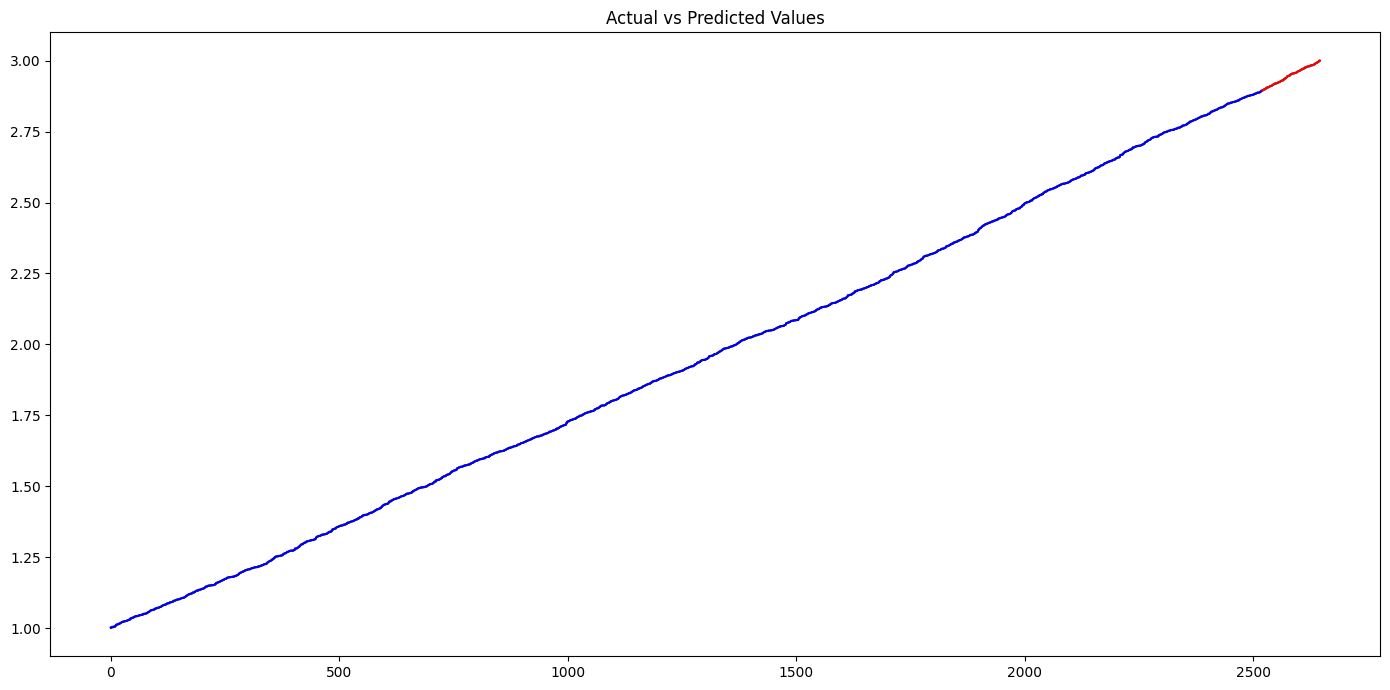

In [66]:
# Generate predictions
y_pred = pd.Series(model.predict(df[indep_var]).flatten())  # Flatten is used to ensure the prediction array shape matches the target array
y_pred.index = df.index


df_reg = pd.DataFrame({
    'obs': df['y'],
    'pred': y_pred
})
df_reg = df_reg.sort_values(by=['obs']).reset_index()

actual_vs_predicted_plot(df_reg['obs'], df_reg['pred'], In_Sample)


y_pred_oos = pd.Series(model.predict(df_test[indep_var]).flatten())
y_pred_oos.index = df_test.index

r_squared_score(df_test[['y']], y_pred_oos)

### **To Do**

1) Run both OLS regression and NN model replicating linear regression.

2) Then consider the Universal Approximation Theorem: 
Multilayer feed-forward networks with as few as one hidden layer are universal approximators.

Add a hidden layer to the NN. The assess if we can fit both the linear and non-linear function.
   - First try with linear activation functions
   - Then try with non-linear (ReLU) activation.

Does the depth and width of the network matter? Let's check.


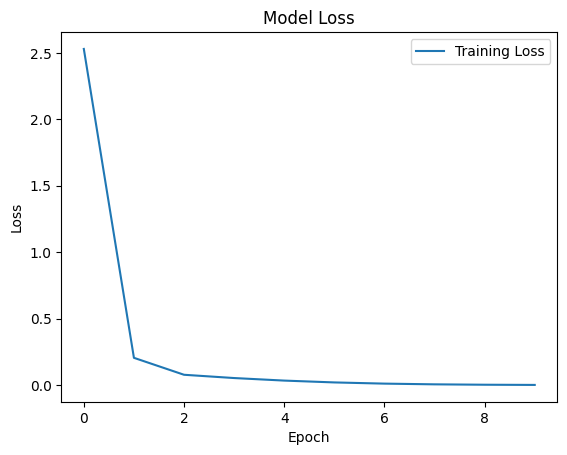

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()